<a href="https://colab.research.google.com/github/Ferstuque/DeepLearning/blob/main/YOLOv3_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv3 - Object Detection with Darknet and COCO

Train a YOLOv3 Object Detector using Darknet and the COCO Dataset

This notebook guides you through training a YOLOv3 model for object detection using the Darknet framework and the COCO dataset.


You can find Darknet installation instructions here: [YOLO](https://pjreddie.com/darknet/yolo/)


Source: https://github.com/ivangrov/YOLOv3-GoogleColab


Author: https://twitter.com/Ivangrov

Before you run this notebook, you must ensure to select the **GPU** cluster for faster training.

In [1]:
# Updating the envinronment
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,551 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,503 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632

In [2]:
# This command installs essential build tools, libraries for image processing, and dependencies for various media codecs.

!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.11).
libavcodec-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libswscale-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  a

In [3]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libswscale-d


In [4]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/local/bin/cmake
cmake version 3.30.5

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [5]:
# Installing OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [6]:
#  Cloning Darknet fork from AlexeyAB
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 15.34 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.


In [7]:
!apt-get install vim

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
vim is already the newest version (2:8.2.3995-1ubuntu2.21).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [8]:
# Uncomment !vim line to check the Makefile if necessary

%cd darknet
#!vim Makefile

/content/darknet


In [9]:
# Downloading YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty	DarknetConfig.cmake.in	Dockerfile.cpu	       LICENSE	      scripts
build		darknet_images.py	Dockerfile.gpu	       Makefile       src
build.ps1	darknet.py		image_yolov3.sh        net_cam_v3.sh  vcpkg.json
cfg		darknet_video.py	image_yolov4.sh        net_cam_v4.sh  video_yolov3.sh
cmake		data			include		       package.xml    video_yolov4.sh
CMakeLists.txt	docker-compose.yml	json_mjpeg_streams.sh  README.md
--2024-12-17 19:33:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  29.7MB/s    in 8.2s    

2024-12-17 19:34:06 (28.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [10]:
# Modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty	DarknetConfig.cmake.in	Dockerfile.cpu	       LICENSE	      scripts
build		darknet_images.py	Dockerfile.gpu	       Makefile       src
build.ps1	darknet.py		image_yolov3.sh        net_cam_v3.sh  vcpkg.json
cfg		darknet_video.py	image_yolov4.sh        net_cam_v4.sh  video_yolov3.sh
cmake		data			include		       package.xml    video_yolov4.sh
CMakeLists.txt	docker-compose.yml	json_mjpeg_streams.sh  README.md      yolov3.weights


In [11]:
# Uncomment to check whether it worked, needs to be stopped manually
#!vim Makefile

In [12]:
# Moving to the parent directory
!ls
%cd ../
!ls

3rdparty	DarknetConfig.cmake.in	Dockerfile.cpu	       LICENSE	      scripts
build		darknet_images.py	Dockerfile.gpu	       Makefile       src
build.ps1	darknet.py		image_yolov3.sh        net_cam_v3.sh  vcpkg.json
cfg		darknet_video.py	image_yolov4.sh        net_cam_v4.sh  video_yolov3.sh
cmake		data			include		       package.xml    video_yolov4.sh
CMakeLists.txt	docker-compose.yml	json_mjpeg_streams.sh  README.md      yolov3.weights
/content
darknet  sample_data


In [13]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package g++-5 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gcc-10-test-results gcc-9-test-results gcc-12-test-results gcc-11-test-results

E: Package 'g++-5' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package gcc-5
update-alternatives: error: alternative path /usr/bin/gcc-5 doesn't exist
update-alternatives: error: alternative path /usr/bin/gcc-5 doesn't exist
update-alternatives: error: alternative path /usr/bin/g++-5 doesn't exist
update-alternatives: error: alternative path /usr/bin/g++-5 doesn't exist


In [14]:
# This step may take a while

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

# Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

4 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
--2024-12-17 19:34:16--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 23.46.228.170, 23.46.228.176
Connecting to developer.nvidia.com (developer.nvidia.com)|23.46.228.170|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://developer.nvidia.com/downloads/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2024-12-17 19:34:16--  https://developer.nvidia.com/downloads/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.n

In [15]:
#Checking whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'The current version in December 2024 is 12.'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'The current version in December 2024 is 12.'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [16]:
# Setting the darknet folder compile it

%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.

In [17]:
!ls
# Let's see our results
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			Dockerfile.cpu	       Makefile       scripts
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       net_cam_v3.sh  src
build		darknet_images.py	image_yolov3.sh        net_cam_v4.sh  vcpkg.json
build.ps1	darknet.py		image_yolov4.sh        obj	      video_yolov3.sh
cfg		darknet_video.py	include		       package.xml    video_yolov4.sh
cmake		data			json_mjpeg_streams.sh  README.md      yolov3.weights
CMakeLists.txt	docker-compose.yml	LICENSE		       results
 CUDA-version: 12020 (12020), GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 20

In [18]:
# These functions will enable us to predict the content of images.

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

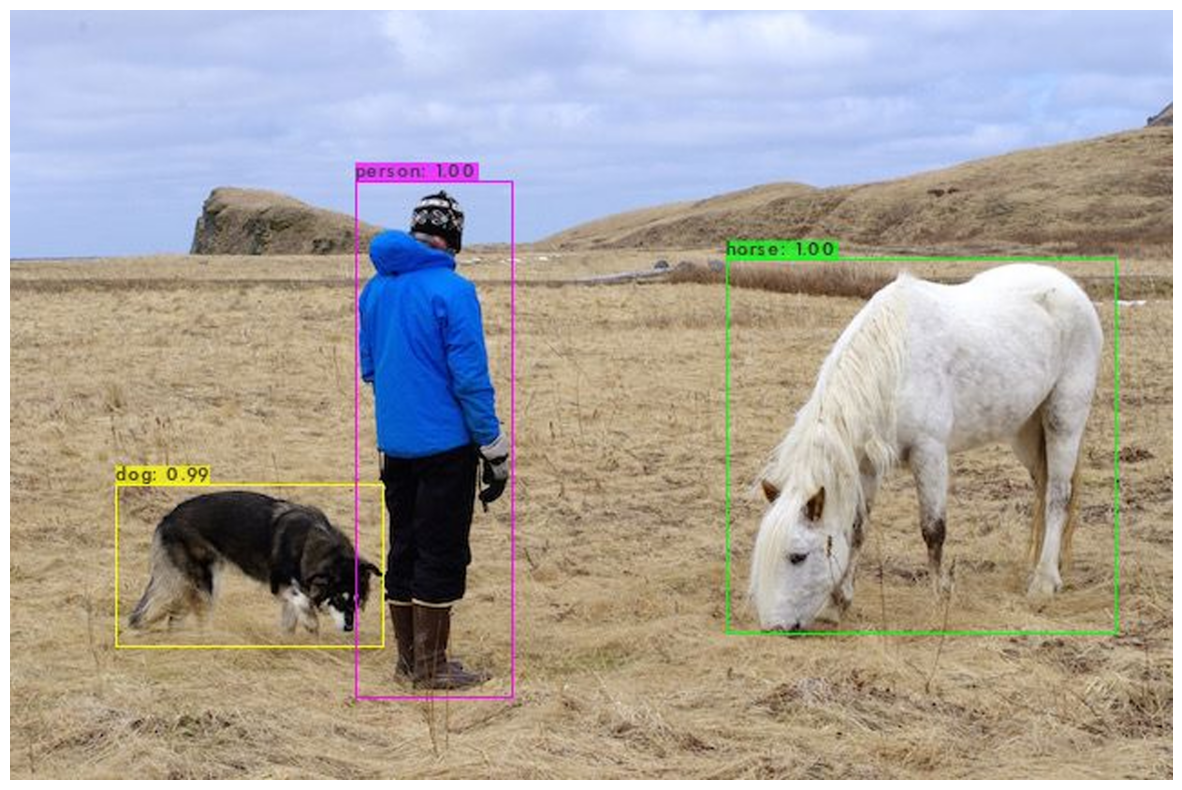

In [19]:
# You should see a person, a dog, and a horse, each enclosed within a bounding box.
imShow('predictions.jpg')

In [20]:
# Let's examine another image from our list.
!ls

3rdparty	darknet			Dockerfile.cpu	       Makefile		results
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       net_cam_v3.sh	scripts
build		darknet_images.py	image_yolov3.sh        net_cam_v4.sh	src
build.ps1	darknet.py		image_yolov4.sh        obj		vcpkg.json
cfg		darknet_video.py	include		       package.xml	video_yolov3.sh
cmake		data			json_mjpeg_streams.sh  predictions.jpg	video_yolov4.sh
CMakeLists.txt	docker-compose.yml	LICENSE		       README.md	yolov3.weights


In [21]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 12020 (12020), GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

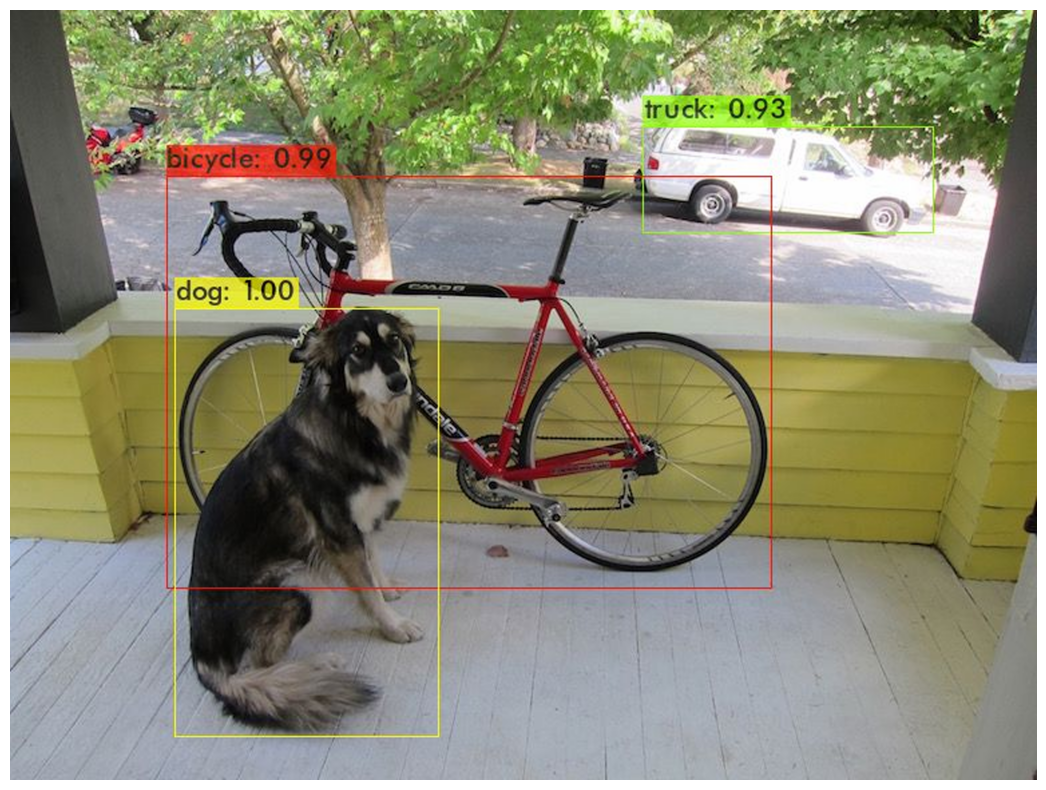

In [22]:
imShow('predictions.jpg')

In [23]:
#Here's how you can mount into your Google Drive, if you wanna
# from google.colab import drive
# drive.mount('/content/drive')

You can download an image dataset from the COCO Dataset collection

In [24]:
!pip install cocodataset

In [25]:
!wget 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
!unzip -q '/content/darknet/annotations_trainval2017.zip'

--2024-12-17 19:37:02--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.100, 52.216.92.219, 52.216.37.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  41.1MB/s    in 6.3s    

2024-12-17 19:37:08 (38.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [26]:
from coco_dataset import coco_dataset_download as cocod
class_name='cat' # Choose your class here
images_count=10 # Number of images
annotations_path='/content/darknet/annotations/instances_train2017.json'

cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=22.87s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
finished images download


In [27]:
# Replace the path and filename ('data/person.jpg') with the desired values.
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

!./darknet detect cfg/yolov3.cfg yolov3.weights cat/000000196623.jpg

 CUDA-version: 12020 (12020), GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

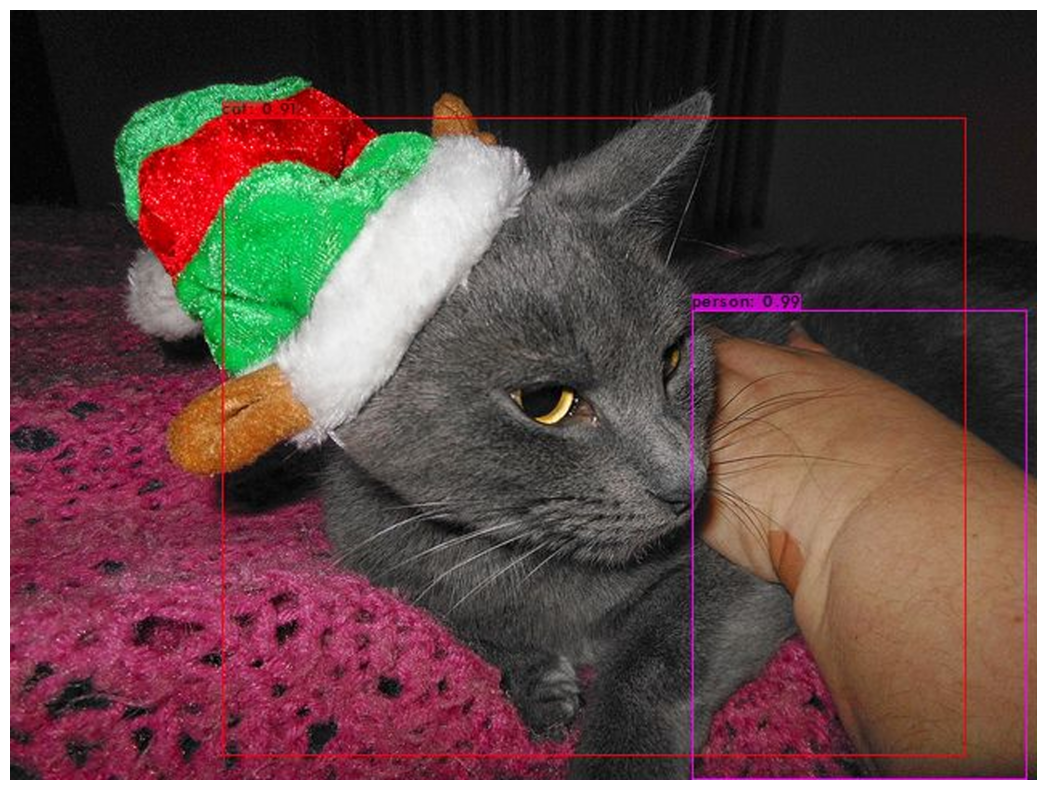

In [28]:
imShow('predictions.jpg')